In [ ]:
# Import required Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Select only the columns to round off
cols_to_round = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Round down specified columns to no decimal
df[cols_to_round] = df[cols_to_round].apply(np.floor)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical data
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical data
        df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2081 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2081 non-null   object 
 1   Age                             2081 non-null   float64
 2   Height                          2081 non-null   float64
 3   Weight                          2081 non-null   float64
 4   family_history_with_overweight  2081 non-null   object 
 5   FAVC                            2081 non-null   object 
 6   FCVC                            2081 non-null   float64
 7   NCP                             2081 non-null   float64
 8   CAEC                            2081 non-null   object 
 9   SMOKE                           2081 non-null   object 
 10  CH2O                            2081 non-null   float64
 11  SCC                             2081 non-null   object 
 12  FAF                             2081 no

In [ ]:
selected_columns = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']
df_encode = df[selected_columns]

categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

label_encoder = LabelEncoder()
for column in categorical_columns:
    df_encode[column] = label_encoder.fit_transform(df_encode[column])

df_encode.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_encode)

df_scaled = pd.DataFrame(df_scaled, columns=df_encode.columns)
df_scaled.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.000000,0.5,1.000000,0.75,0.166667
1,0.0,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.666667,0.666667,1.0,1.0,1.0,1.000000,0.0,0.666667,0.75,0.166667
2,1.0,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.5,0.333333,0.75,0.166667
3,1.0,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.666667,0.666667,0.0,0.5,0.0,0.666667,0.0,0.333333,1.00,0.833333
4,1.0,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.000000,0.666667,0.0,0.5,0.0,0.000000,0.0,0.666667,0.75,1.000000


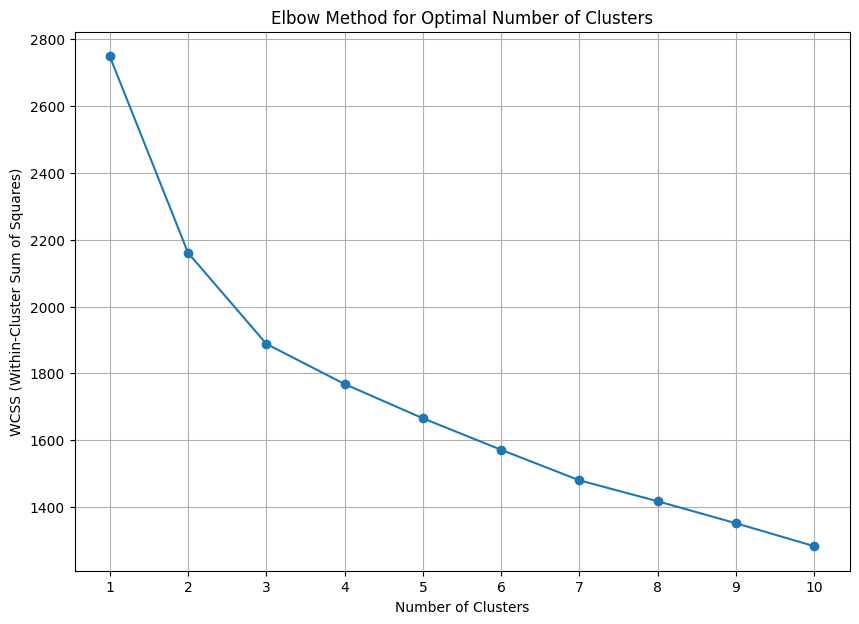

In [ ]:
# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results of the Elbow method
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# From the plot, we choose the optimal number of clusters (k) where the elbow occurs
optimal_k = 3

# Training KMeans Model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_scaled)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,2
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1


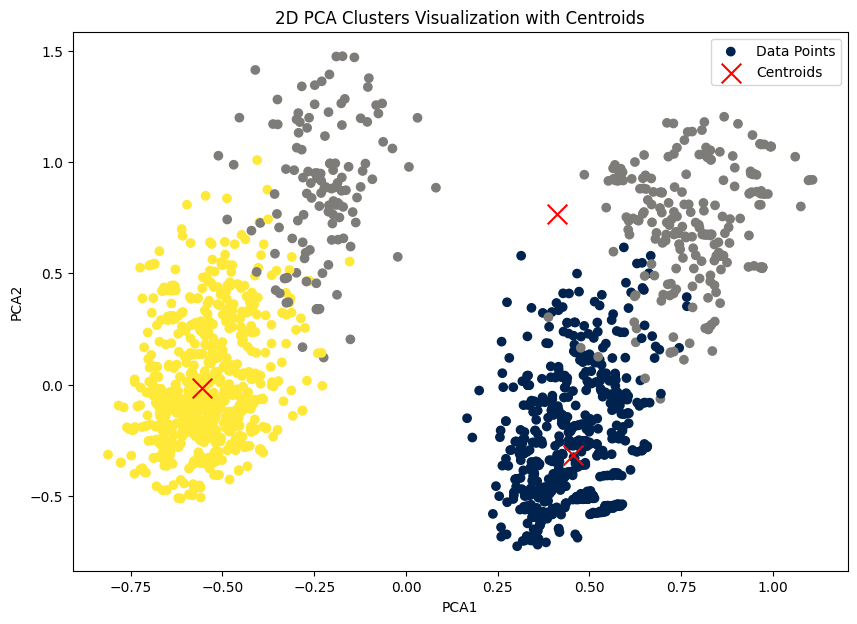

In [ ]:
# PCA initialization and transformation
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='cividis', marker='o', label='Data Points')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('2D PCA Clusters Visualization with Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

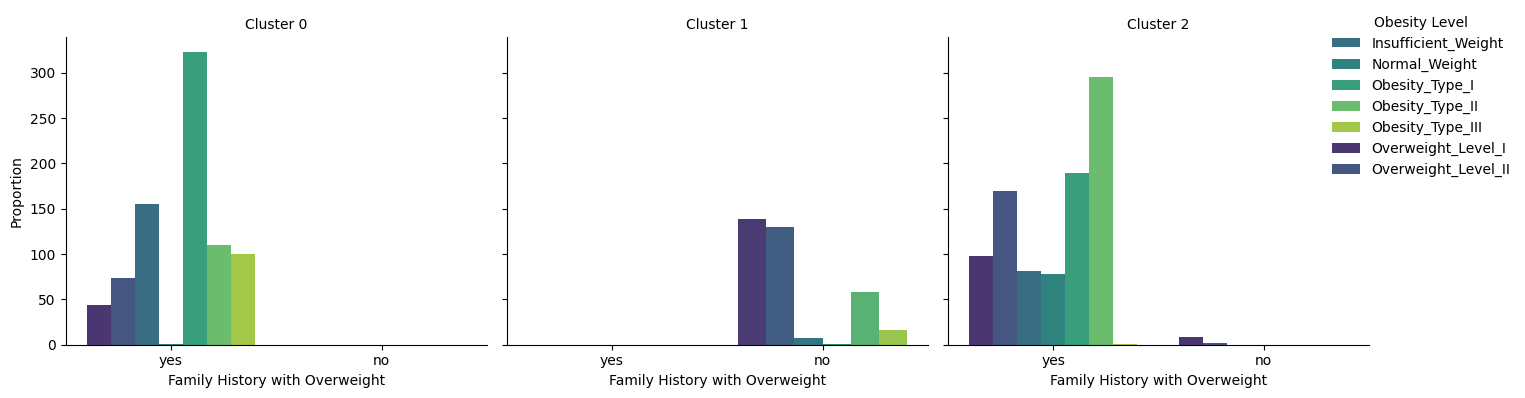

In [ ]:
# Group by 'Cluster', 'family_history_with_overweight', and 'NObeyesdad', and count occurrences
clustered_data = df.groupby(['Cluster', 'family_history_with_overweight', 'NObeyesdad']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = clustered_data.pivot_table(index=['family_history_with_overweight', 'NObeyesdad'],
                                       columns='Cluster', values='count', fill_value=0)

# Normalize the data within each family history category for better comparison
pivot_data_norm = pivot_data.div(pivot_data.sum(axis=1), axis=0)

# Plotting faceted grid plot
g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='family_history_with_overweight', y='count', hue='NObeyesdad',
                palette='viridis', dodge=True)
g.set_titles('Cluster {col_name}')
g.set_axis_labels('Family History with Overweight', 'Proportion')

# Adjust legend position
g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

In [ ]:
# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,0,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,0,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,2,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,1,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,1,28.342381


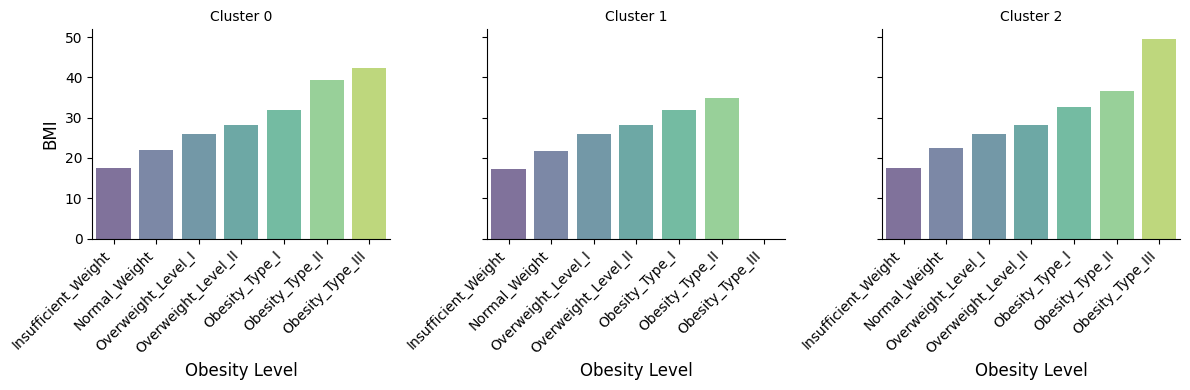

In [ ]:
# Define the desired order of obesity levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Use seaborn's FacetGrid to create bar plots by cluster and obesity level
g = sns.FacetGrid(df, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='NObeyesdad', y='BMI', palette='viridis', alpha=0.7, ci=None, order=obesity_order)

# Customize the plot
g.set_titles('Cluster {col_name}', fontsize=15)  # Increase title font size
g.set_axis_labels('Obesity Level', 'BMI', fontsize=12)  # Set axis label font size

# Adjust x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add space between plots
plt.tight_layout()
plt.show()

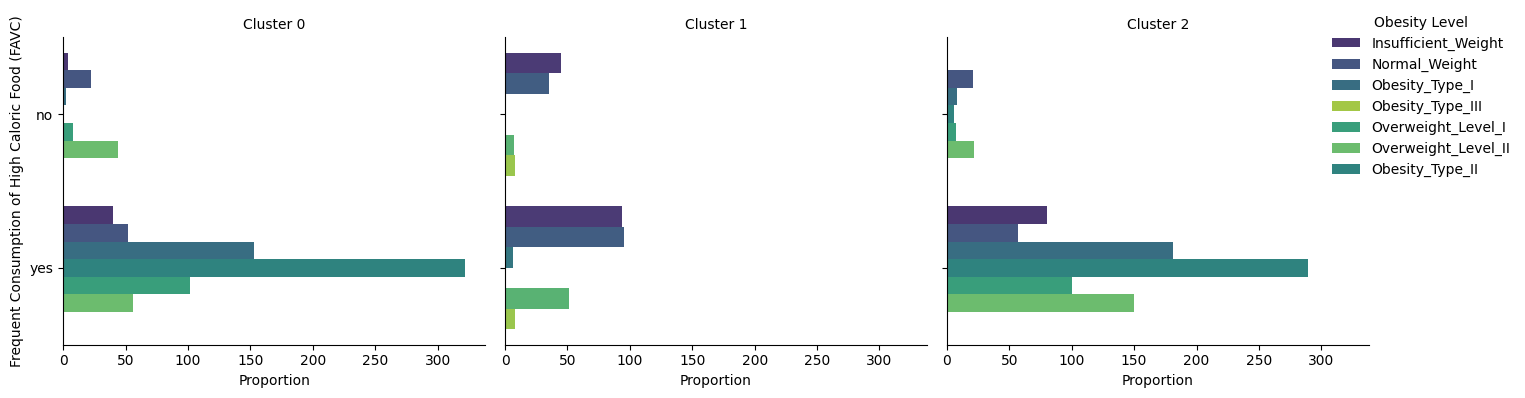

In [ ]:
# Group by 'Cluster', 'FAVC', and 'NObeyesdad' and count occurrences
clustered_data = df.groupby(['Cluster', 'FAVC', 'NObeyesdad']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = clustered_data.pivot_table(index=['FAVC', 'NObeyesdad'], columns='Cluster', values='count', fill_value=0)

# Plotting faceted grid plot with horizontal bar plots for FAVC
g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='count', y='FAVC', hue='NObeyesdad',
                palette='viridis', dodge=True, orient='h')  # orient='h' for horizontal bar plot
g.set_titles('Cluster {col_name}')
g.set_axis_labels('Proportion', 'Frequent Consumption of High Caloric Food (FAVC)')

# Adjust legend position
g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

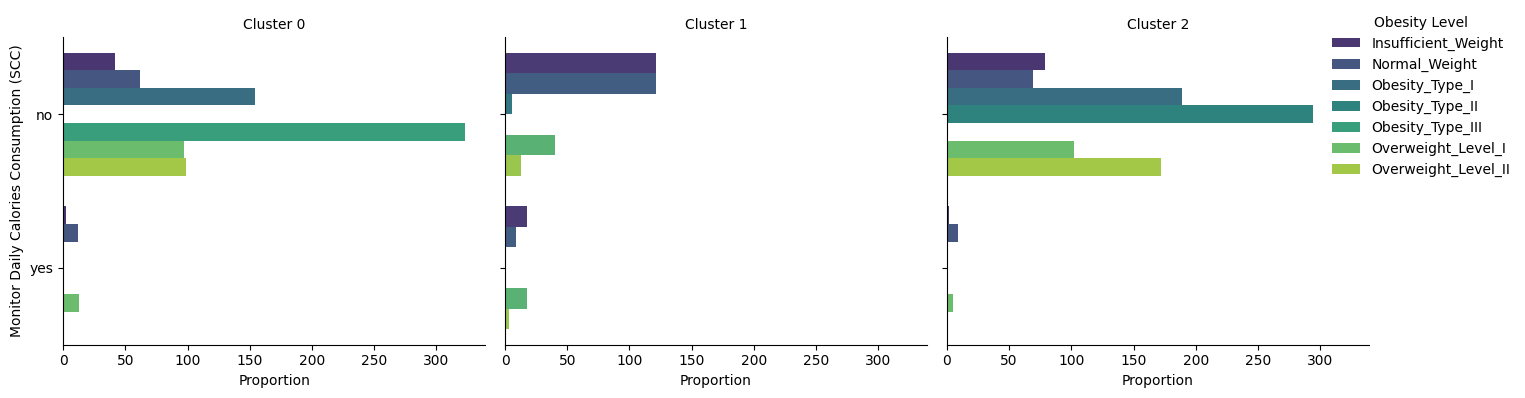

In [ ]:
# Group by 'Cluster', 'SCC', and 'NObeyesdad' and count occurrences
clustered_data = df.groupby(['Cluster', 'SCC', 'NObeyesdad']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = clustered_data.pivot_table(index=['SCC', 'NObeyesdad'], columns='Cluster', values='count', fill_value=0)

# Plotting faceted grid plot with horizontal bar plots for SCC
g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='count', y='SCC', hue='NObeyesdad',
                palette='viridis', dodge=True, orient='h')  # orient='h' for horizontal bar plot
g.set_titles('Cluster {col_name}')
g.set_axis_labels('Proportion', 'Monitor Daily Calories Consumption (SCC)')

# Adjust legend position
g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Define the order of obesity levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                 'Obesity_Type_III']

# Create interactive scatter plots using Plotly Express
fig_ch2o = px.scatter(df, x='CH2O', y='NObeyesdad', color='Cluster',
                      category_orders={'NObeyesdad': obesity_order},
                      title='CH2O vs. Obesity Level by Cluster',
                      labels={'CH2O': 'CH2O', 'NObeyesdad': 'Obesity Level', 'Cluster': 'Cluster'})

fig_fcvc = px.scatter(df, x='FCVC', y='NObeyesdad', color='Cluster',
                      category_orders={'NObeyesdad': obesity_order},
                      title='FCVC vs. Obesity Level by Cluster',
                      labels={'FCVC': 'FCVC', 'NObeyesdad': 'Obesity Level', 'Cluster': 'Cluster'})

fig_ncp = px.scatter(df, x='NCP', y='NObeyesdad', color='Cluster',
                     category_orders={'NObeyesdad': obesity_order},
                     title='NCP vs. Obesity Level by Cluster',
                     labels={'NCP': 'NCP', 'NObeyesdad': 'Obesity Level', 'Cluster': 'Cluster'})

# Update layout for all figures
fig_ch2o.update_layout(height=500, showlegend=True)
fig_fcvc.update_layout(height=500, showlegend=True)
fig_ncp.update_layout(height=500, showlegend=True)

# Show plots
fig_ch2o.show()
fig_fcvc.show()
fig_ncp.show()

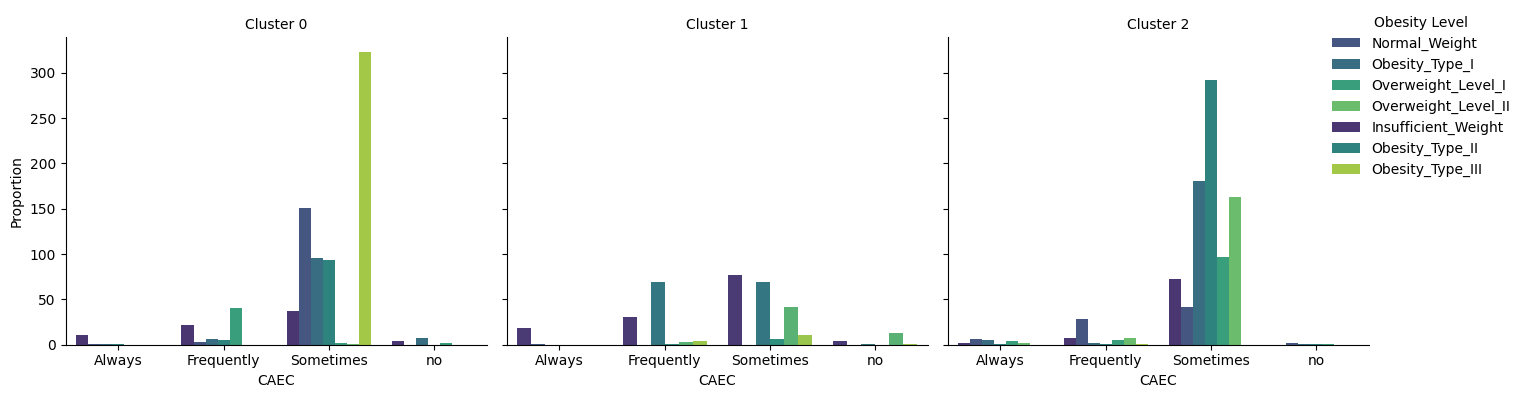

In [ ]:
clustered_data = df.groupby(['Cluster', 'CAEC', 'NObeyesdad']).size().reset_index(name='count')

pivot_data = clustered_data.pivot_table(index=['CAEC', 'NObeyesdad'],
                                       columns='Cluster', values='count', fill_value=0)

pivot_data_norm = pivot_data.div(pivot_data.sum(axis=1), axis=0)

g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='CAEC', y='count', hue='NObeyesdad',
                palette='viridis', dodge=True)
g.set_titles('Cluster {col_name}')
g.set_axis_labels('CAEC', 'Proportion')

g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

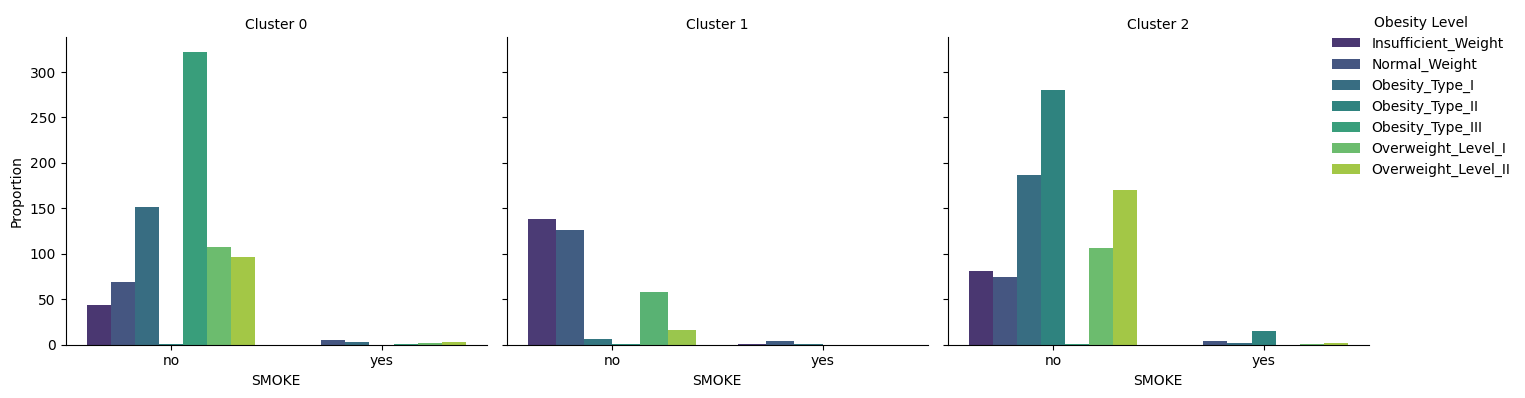

In [ ]:
clustered_data = df.groupby(['Cluster', 'SMOKE', 'NObeyesdad']).size().reset_index(name='count')

pivot_data = clustered_data.pivot_table(index=['SMOKE', 'NObeyesdad'],
                                       columns='Cluster', values='count', fill_value=0)

pivot_data_norm = pivot_data.div(pivot_data.sum(axis=1), axis=0)

g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='SMOKE', y='count', hue='NObeyesdad',
                palette='viridis', dodge=True)
g.set_titles('Cluster {col_name}')
g.set_axis_labels('SMOKE', 'Proportion')

g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

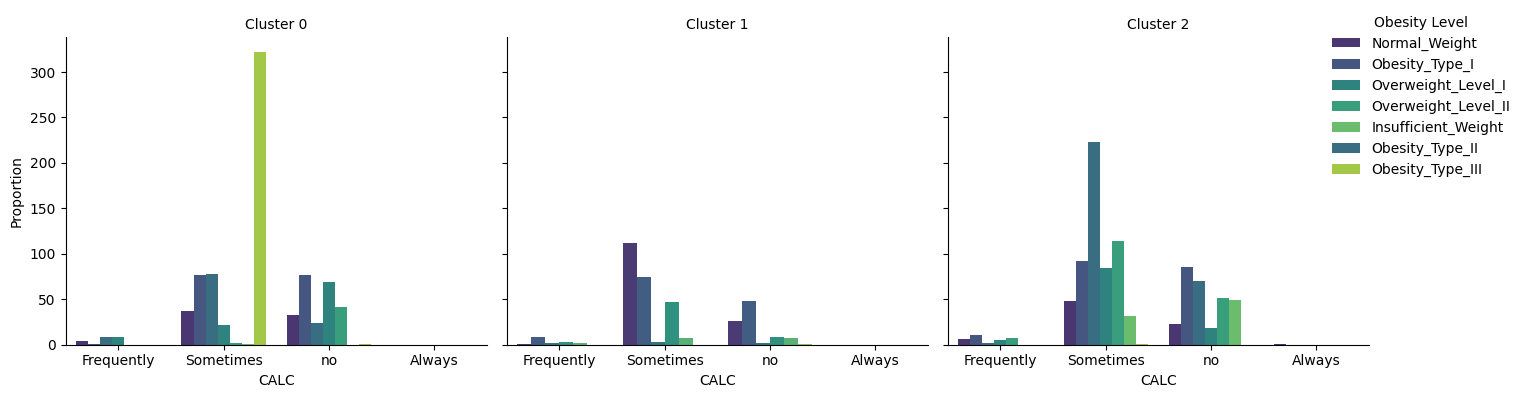

In [ ]:
clustered_data = df.groupby(['Cluster', 'CALC', 'NObeyesdad']).size().reset_index(name='count')

pivot_data = clustered_data.pivot_table(index=['CALC', 'NObeyesdad'],
                                       columns='Cluster', values='count', fill_value=0)

pivot_data_norm = pivot_data.div(pivot_data.sum(axis=1), axis=0)

g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='CALC', y='count', hue='NObeyesdad',
                palette='viridis', dodge=True)
g.set_titles('Cluster {col_name}')
g.set_axis_labels('CALC', 'Proportion')

g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

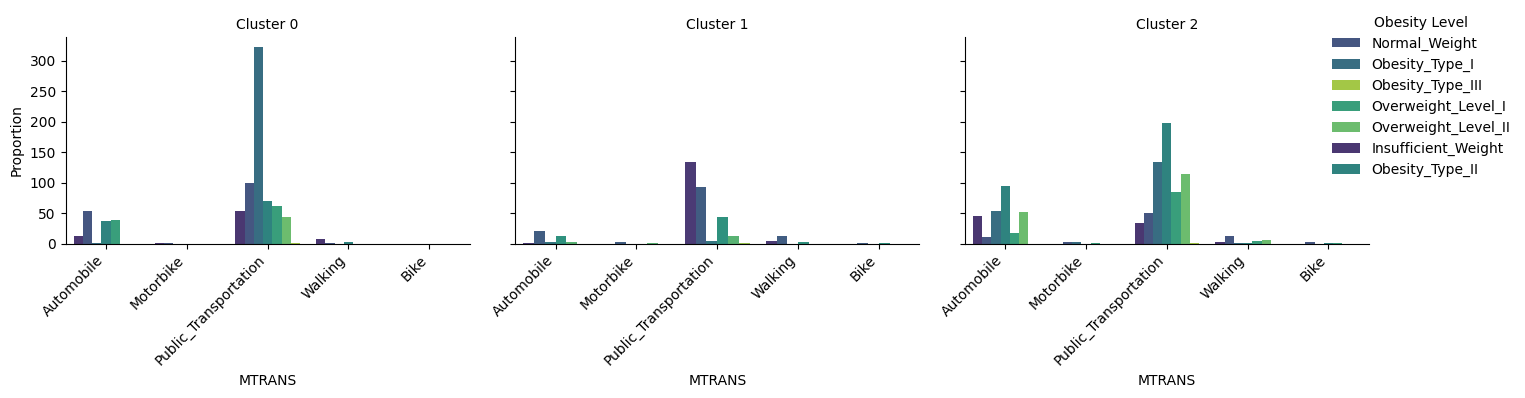

In [ ]:
# Group by 'Cluster', 'MTRANS', and 'NObeyesdad', and count occurrences
clustered_data = df.groupby(['Cluster', 'MTRANS', 'NObeyesdad']).size().reset_index(name='count')

# Pivot the data for plotting
pivot_data = clustered_data.pivot_table(index=['MTRANS', 'NObeyesdad'],
                                       columns='Cluster', values='count', fill_value=0)

# Plotting faceted grid plot
g = sns.FacetGrid(clustered_data, col='Cluster', col_wrap=3, height=4, sharey=True)
g.map_dataframe(sns.barplot, x='MTRANS', y='count', hue='NObeyesdad',
                palette='viridis', dodge=True)
g.set_titles('Cluster {col_name}')
g.set_axis_labels('MTRANS', 'Proportion')

# Adjust x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust legend position
g.add_legend(title='Obesity Level', loc='upper right', bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()

In [ ]:
# Define columns to plot
columns = ["FAF", "TUE"]

# Create a subplot grid
fig = make_subplots(rows=1, cols=2, subplot_titles=[f'Clusters vs. {column}' for column in columns], horizontal_spacing=0.15)

for i, column in enumerate(columns):
    # Create a box plot for each column
    trace = go.Box(y=df[column], x=df["Cluster"], name=f'Clusters vs. {column}')
    fig.add_trace(trace, row=1, col=i+1)

# Update layout
fig.update_layout(
    showlegend=False,
    height=600,
    title_text="Clusters vs. Physical Activity Frequency (FAF) and Time Usage on Entertainment (TUE)",
)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Cluster", row=1, col=1)
fig.update_xaxes(title_text="Cluster", row=1, col=2)
fig.update_yaxes(title_text="Physical Activity Frequency (FAF)", row=1, col=1)
fig.update_yaxes(title_text="Time Usage on Entertainment (TUE)", row=1, col=2)

# Show the plot
fig.show()

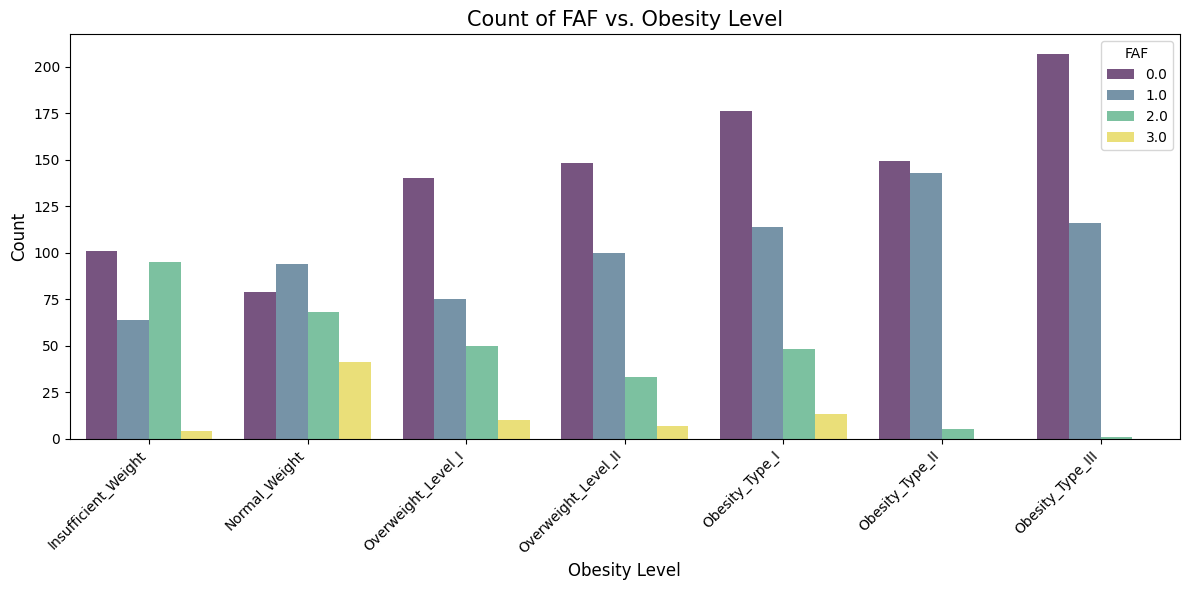

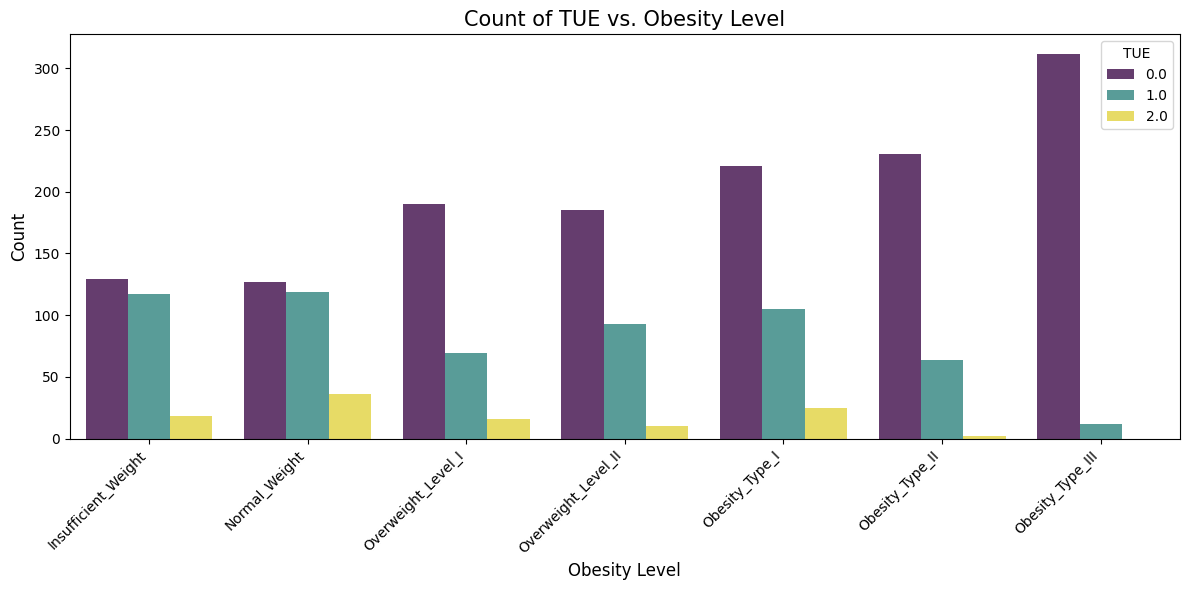

In [ ]:
# Group by 'NObeyesdad', 'FAF', and 'TUE' and count occurrences
count_data_faf = df.groupby(['NObeyesdad', 'FAF']).size().reset_index(name='count')
count_data_tue = df.groupby(['NObeyesdad', 'TUE']).size().reset_index(name='count')

# Define the order of obesity levels
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
                 'Obesity_Type_III']

# Plotting bar plot for FAF
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data_faf, x='NObeyesdad', y='count', hue='FAF', order=obesity_order, palette='viridis', alpha=0.7)

# Customize the plot for FAF
plt.title('Count of FAF vs. Obesity Level', fontsize=15)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='FAF', loc='upper right')

# Show the plot for FAF
plt.tight_layout()
plt.show()

# Plotting bar plot for TUE
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data_tue, x='NObeyesdad', y='count', hue='TUE', order=obesity_order, palette='viridis', alpha=0.8)

# Customize the plot for TUE
plt.title('Count of TUE vs. Obesity Level', fontsize=15)
plt.xlabel('Obesity Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='TUE', loc='upper right')

# Show the plot for TUE
plt.tight_layout()
plt.show()

In [ ]:
# Define columns to plot
columns = ["Age", "Weight", "Height", "BMI"]

# Create a subplot grid
fig = make_subplots(rows=2, cols=2, subplot_titles=[f'Clusters vs. {column}' for column in columns], horizontal_spacing=0.15)

for i, column in enumerate(columns):
    row = i // 2 + 1
    col = i % 2 + 1

    # Create a box plot for each column
    trace = go.Box(y=df[column], x=df["Cluster"], name=f'Clusters vs. {column}')
    fig.add_trace(trace, row=row, col=col)

# Update layout
fig.update_layout(
    showlegend=False,
    height=800,
    title_text="Clusters vs. Age, Weight, Height, and BMI",
)

# Show the plot
fig.show()